# HW2
## Prerna Kaul

### Problem 1 - Feedforward Relu Network

#### 1.3

In [0]:
import numpy as np
import matplotlib.pyplot as plt


def Relu(vector):
  return (np.maximum(0,vector))

def sigmoid(x):
  return (1/(1+np.exp(-x)))
  

In [0]:
def ff_nn_Relu(input_vec, wt1, wt2, b1, c):
  
  h = Relu((input_vec.T).dot(wt1)+ b1)

  y_hat = sigmoid(h.dot(wt2) + c)

  return y_hat
  
  

In [129]:
x = np.array([[1, 0, 0],
             [-1, -1, 1]])


w1 = np.array([[1, -1, 0],
              [0, 0, 0.5]])

b = np.array([0,0,1])

w2 = np.array([1, 0,-1]).reshape([3,1])

c = [1]


ff_nn_Relu(x, w1, w2, b, c)

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

### Problem 2 - Gradient Descent

#### 2.1

$\frac{\partial f}{\partial x} = -3x^2 - 200(y^2 - x)$ <br>
$\frac{\partial f}{\partial y} = 400y (y^2 - x)$

#### 2.2

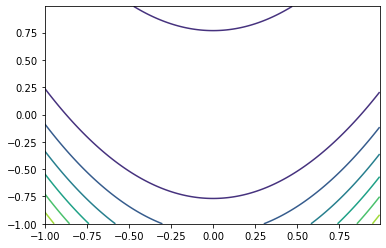

In [130]:
delta = 0.01
x = np.arange(-1, 1, delta)
y = np.arange(-1, 1, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X**3) + (100 *  (Y-(X**2))**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

#### 2.3

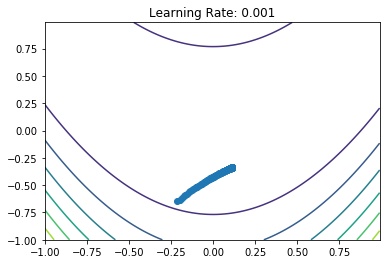

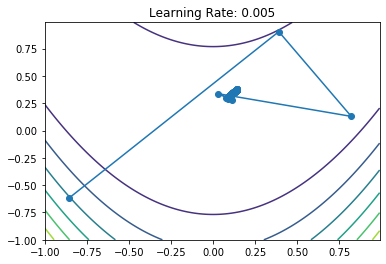

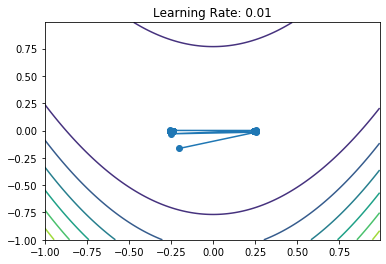

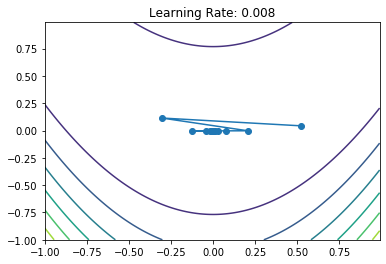

In [131]:
# function for derivative

def grad_f(vector):
  x, y = vector
  
  df_dx = -3*x**2 - 200*(y**2 - x)
  df_dy = 400*y* (y**2 - x)
  
  return np.array([df_dx, df_dy])


# function for gradient descent

def grad_descent(starting_point=None, iterations=20, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1,1,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)
  
# trying out different learning rates
np.random.seed(1010)

traj1 = grad_descent(iterations = 1000, learning_rate = 0.0001)
traj2 = grad_descent(iterations = 1000, learning_rate = 0.005)
traj3 = grad_descent(iterations = 1000, learning_rate = 0.01)
traj4 = grad_descent(iterations = 1000, learning_rate = 0.008)


traj = [traj1, traj2, traj3, traj4]

l_rates = [0.001, 0.005, 0.01, 0.008]

for i in range(4):
  t = traj[i]
  l = l_rates[i]
  fig, ax = plt.subplots()
  CS = ax.contour(X,Y,Z)
  plt.title("Learning Rate: "+str(l))
  x= t[:,0]
  y= t[:,1]
  plt.plot(x,y,'-o')




With small learnig rates, the gradient movies slowly towards the minimum as seen in the case of learning rates 0.001. For moderate values like 0.005 and 0.008, the minimum is found comparitively faster and the minimum is reached in a few iterations. But if we make the learning rate much higher like 0.01, gradient just oscillates and misses the minimum everytime, as can be seen from the plot.



#### 2.4

In [0]:
# gradient descent with momentum

def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,3,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

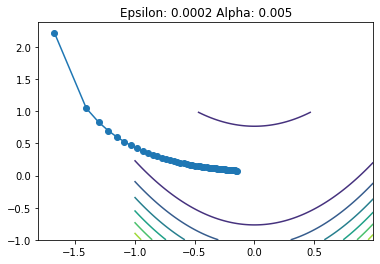

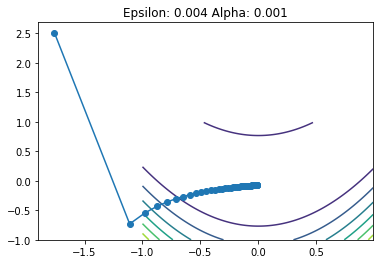

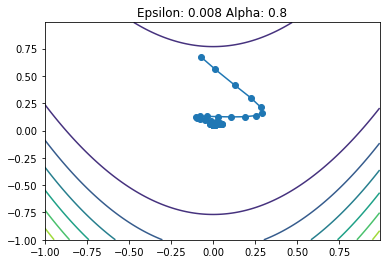

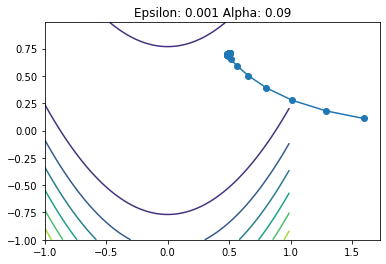

In [133]:
# test different values of hyper parameters

np.random.seed(5)

traj1 = grad_descent_with_momentum(iterations=50, epsilon=0.0002, alpha=0.005)
traj2 = grad_descent_with_momentum(iterations=50, epsilon=0.0004, alpha=0.001)
traj3 = grad_descent_with_momentum(iterations=50, epsilon=0.0008, alpha=0.8)
traj4 = grad_descent_with_momentum(iterations=50, epsilon=0.001, alpha=0.09)

traj = [traj1, traj2, traj3, traj4]
eps = [0.0002, 0.004, 0.008, 0.001]
alp = [0.005, 0.001, 0.8, 0.09]

for i in range(4):
  t = traj[i]
  ep = eps[i]
  al = alp[i]
  fig, ax = plt.subplots()
  CS = ax.contour(X,Y,Z)
  plt.title("Epsilon: "+str(ep)+" Alpha: "+str(al))
  x= t[:,0]
  y= t[:,1]
  plt.plot(x,y,'-o')


### Problem 3 - Backpropagation

#### 3.1

Since the output function is sigmoid, the loss for thr activation function will be Binary Cross Entropy. <br>
$L = -y_{i}log(\hat{y_{i}}) - (1- y_{i})log(1- \hat{y_{i}})$<br>

$\theta = \left\{c,V,W,b \right\}$ where<br>
c - bias vector for output layer<br>
V - weight matrix for output layer<br>
W - weight matrix for hidden layer <br>
b - bias vector for hidden layer<br><br>

$\frac{dL}{d\hat{y}} = \left (\frac{y_{i}}{\hat{y_{i}}} - \frac{1 - y_{i}}{1 - \hat{y_{i}}} \right)  = e$<br><br>

Gradients of parameters w.r.t. Loss:<br>

$\frac{\partial L}{\partial c} =e\frac{\partial \hat{y}}{\partial c} = e\sigma(\hat{y})(1 - \sigma(\hat{y}))$<br>

$\frac{\partial L}{\partial V} = e\sigma(\hat{y})(1 - \sigma(\hat{y}))out_{1}$<br>

$\frac{\partial L}{\partial b} = e\frac{\partial \hat{y}}{\partial out_{1}}\frac{\partial out_1}{\partial in_1}\frac{\partial in_1}{\partial b} = e\sigma(\hat{y})(1 - \sigma(\hat{y}))V \frac{d}{d in_1}Relu(in_1)$

$\frac{\partial L}{\partial W} = e\frac{\partial \hat{y}}{\partial out_{1}}\frac{\partial out_1}{\partial in_1}\frac{\partial in_1}{\partial W} = e\sigma(\hat{y})(1 - \sigma(\hat{y}))V \frac{d}{d in_1}Relu(in_1)X$ <br>



where $\hat{y} = \sigma(V.out_1 + c)$<br>
$out_1 = Relu(X^T.W + b)$<br>
$in_1 = X^T.W+b$<br>

#### 3.2

In [0]:
def grad_loss_function(y,yhat):
    return -y/yhat+(1-y)/(1-yhat)

def get_loss(y,yhat):
    return np.average(-y * np.log(yhat) - (1-y)*np.log(1-yhat))

def grad_sigmoid(x):
    return x * (1 - x)

def grad_relu(x):
    return np.where(x > 0, 1, 0)

def grad_f(x,y,w,v,b,c):
  
    # forward pass
    a1 = x.dot(w) + b
    h1 = Relu(a1)
    y_hat = sigmoid(h1.dot(v) + c)
    total_loss = get_loss(y,y_hat)
    
    # partial derivatives
    dv = h1.T.dot(grad_loss_function(y,y_hat) * y_hat * (1 - y_hat))
    dw = x.T.dot((grad_loss_function(y,y_hat) * y_hat * (1 - y_hat)).dot(v.T) * grad_relu(a1))
    dc = (grad_loss_function(y,y_hat) * y_hat * (1 - y_hat)).sum()
    db = ((grad_loss_function(y,y_hat) * y_hat * (1 - y_hat)).dot(v.T) * grad_relu(a1)).sum(axis=0)
    
    
    return (dv,dw,dc,db,total_loss)

#### 3.3

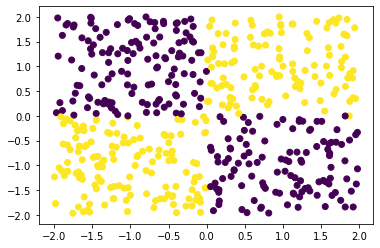

In [255]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

y = np.array(y).reshape(500,1)

#### 3.4

In [0]:
def grad_descent(x,y,iters,lr):
  
    # initialize random weights
    w = np.random.randn(6).reshape(2,3)
    b = np.random.randn(3).reshape(1,3)
    v = np.random.randn(3).reshape(3,1)
    c = np.random.randn(1)
    
    
    # lists to keep track of losses and trajectories of gradient
    losses = []
    trajs = [(w,b,v,c)]
    
    
    for i in range(iters):
        dv,dw,dc,db,loss = grad_f(x,y,w,v,b,c)
        new_w = w - lr * dw
        new_v = v - lr * dv
        new_c = c - lr * dc
        new_b = b - lr * db
        
        trajs.append((new_w,new_v,new_c,new_b))
        losses.append(loss)
        
        w = new_w
        v = new_v
        b = new_b
        c = new_c
        
    return losses,trajs

In [0]:
loss_hist,traj_his = grad_descent(x,y,iters = 300,lr = 1e-4)

Text(0, 0.5, 'Total Loss')

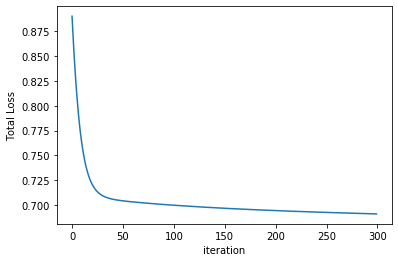

In [263]:
plt.plot(loss_hist)
plt.xlabel('iteration')
plt.ylabel('Total Loss')

#### 3.5

In [0]:
def grad_descent_momentum(x,y,iters,alpha,epsilon):
  
    # initialize random weight
    w = np.random.randn(6).reshape(2,3)
    b = np.random.randn(3).reshape(1,3)
    v = np.random.randn(3).reshape(3,1)
    c = np.random.randn(1)
    
    losses = []
    trajs = [(w,b,v,c)]
    
    w1 = np.zeros(w.shape)
    b1 = np.zeros(b.shape)
    v1 = np.zeros(v.shape)
    c1 = np.zeros(c.shape)
    
    for i in range(iters):
      
        dv,dw,dc,db,loss = grad_f(x,y,w,v,b,c)
        
        w1 = epsilon * w1 + (1 - epsilon) * dw
        v1 = epsilon * v1 + (1 - epsilon) * dv
        c1 = epsilon * c1 + (1 - epsilon) * dc
        b1 = epsilon * b1 + (1 - epsilon) * db
        
        new_w = w - alpha * w1
        new_v = v - alpha * v1
        new_c = c - alpha * c1
        new_b = b - alpha * b1
        
        trajs.append((new_w,new_b,new_v,new_c))
        losses.append(loss)
        
        w = new_w
        v = new_v
        b = new_b
        c = new_c
        
    return losses,trajs

In [0]:

loss_hist,traj_his = grad_descent_momentum(x,y,iters = 100,alpha = 1e-4,epsilon = 0.6)

Text(0, 0.5, 'Total Loss')

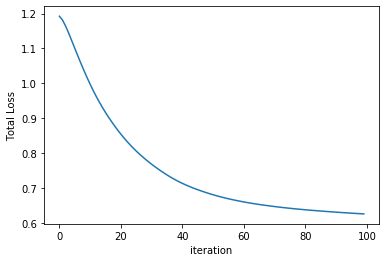

In [266]:
plt.plot(loss_hist)
plt.xlabel('iteration')
plt.ylabel('Total Loss')

Gradient descent with momentum takes less time to converge as compared to gradeint descent without momentum.

#### 3.6

In [0]:
def decision(x,traj):
    w,b,v,c = traj
    y_hat = np.where(sigmoid((relu(x.dot(w) + b)).dot(v) + c) > 0.5,1,0)
    return y_hat
  

In [0]:
traj = traj_his[-1]
y_hat = decision(x,traj)

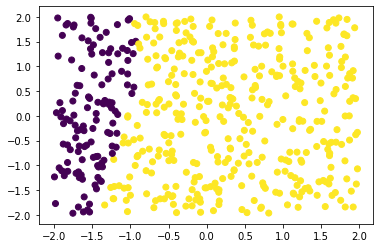

In [274]:
plt.scatter(x[:,0],x[:,1],c=y_hat.reshape(500))

In [0]:
def plot_decision_boundary(x,params):
  
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    h = 0.2
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    _in=np.array([xx.ravel(), yy.ravel()]).T
    
    z = decision(_in,params)
    z = z.reshape(xx.shape)
    
    plt.contourf(xx, yy, z, alpha=0.2)
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y))

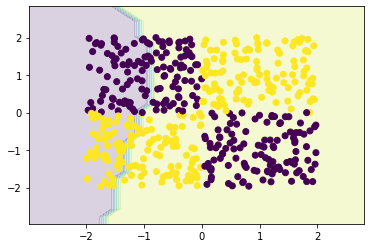

In [278]:
plot_decision_boundary(x,traj_his[-1])